# **Proyecto ML sobre vinos**

*Crear un modelo de regresion multivariable.*



# Inicio

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [1]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
# %matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);



# Obteniendo los datos

## Descargando los datos

In [2]:
import os;
import tarfile;
import urllib.request;

WINE_PATH = os.path.join("datasets", "winequality");


In [3]:
import pandas as pd

def load_wine_data(wine_path):
    csv_path = os.path.join(wine_path, "winequality.csv")
    print("Leyendo", csv_path)
    return pd.read_csv(csv_path)



## Primer acercamiento a la estructura de los datos

In [7]:
rwine = load_wine_data(WINE_PATH)
rwine.head()


Leyendo datasets/winequality/winequality.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:

rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
rwine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


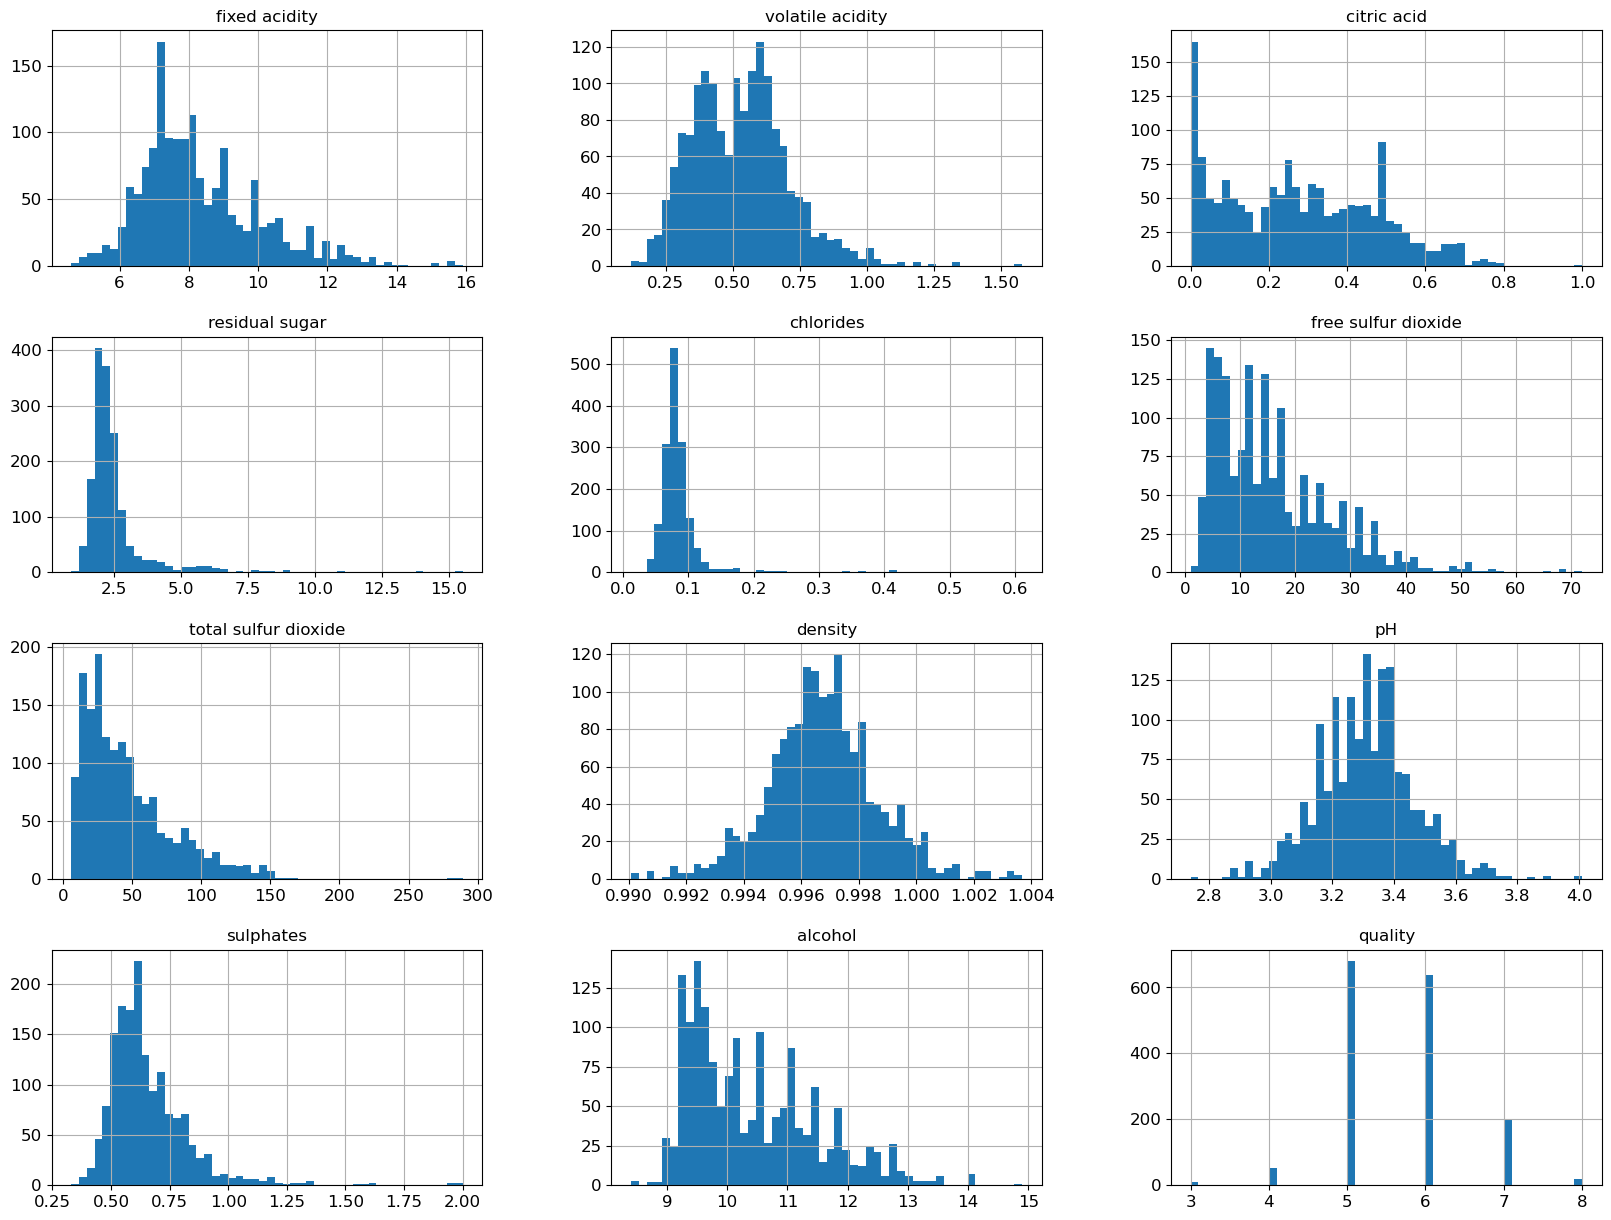

In [11]:
rwine.hist(bins=50, figsize =(20,15))
plt.show()

# Descubrir y visualizar los datos para obtener información

---



## Visualizando datos geográficos


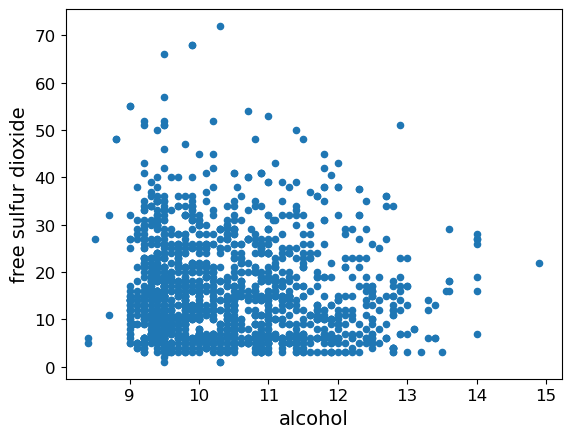

In [16]:
rwine.plot(kind="scatter", x="alcohol", y="free sulfur dioxide");


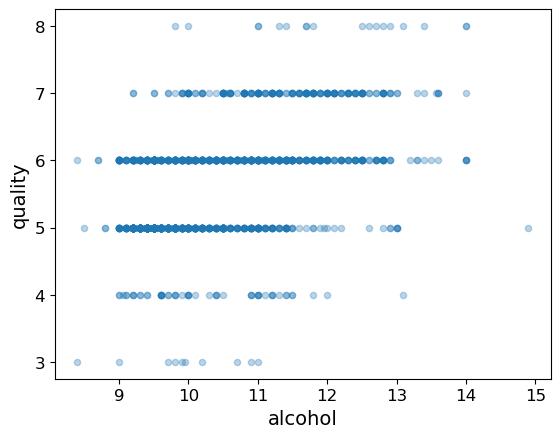

In [22]:
rwine.plot(kind="scatter", x="alcohol", y="quality", alpha=0.3);


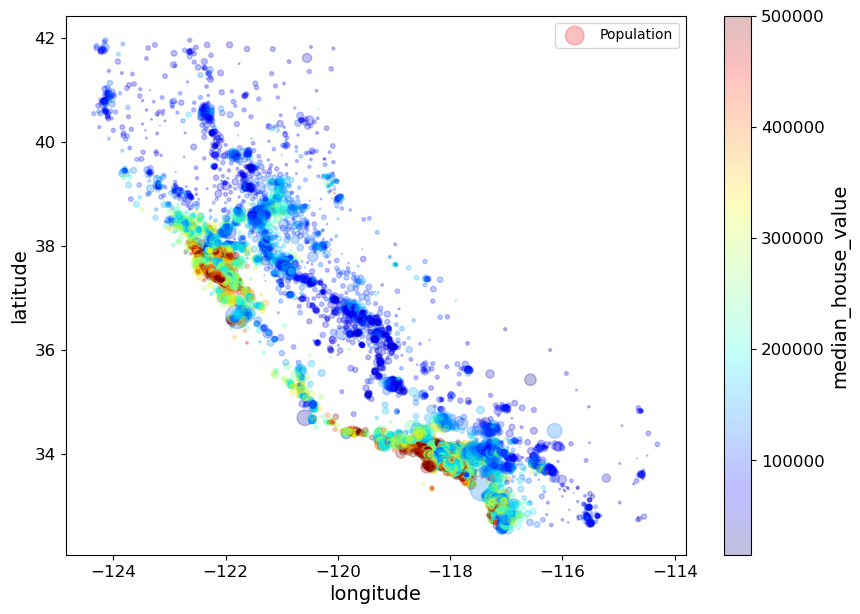

In [13]:
rwine.plot(kind="scatter", x="alcohol", y="quality", alpha=0.25,
            s=rwine["population"]/100, label="Population", figsize=(10,7),
            c=("median_house_value"), cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=True
            );

In [14]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f38588e5f50>)

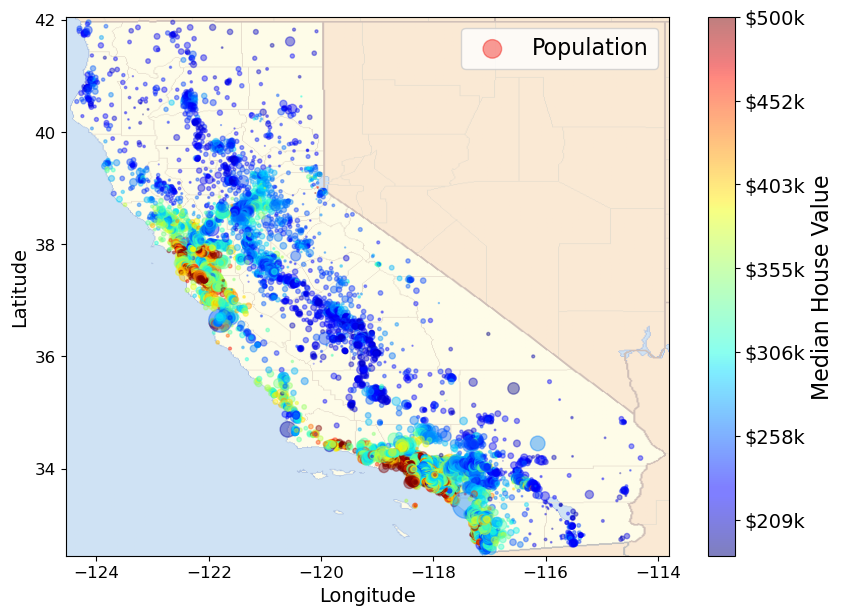

In [15]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Buscando correlaciones

In [12]:
corr_matrix = rwine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [26]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

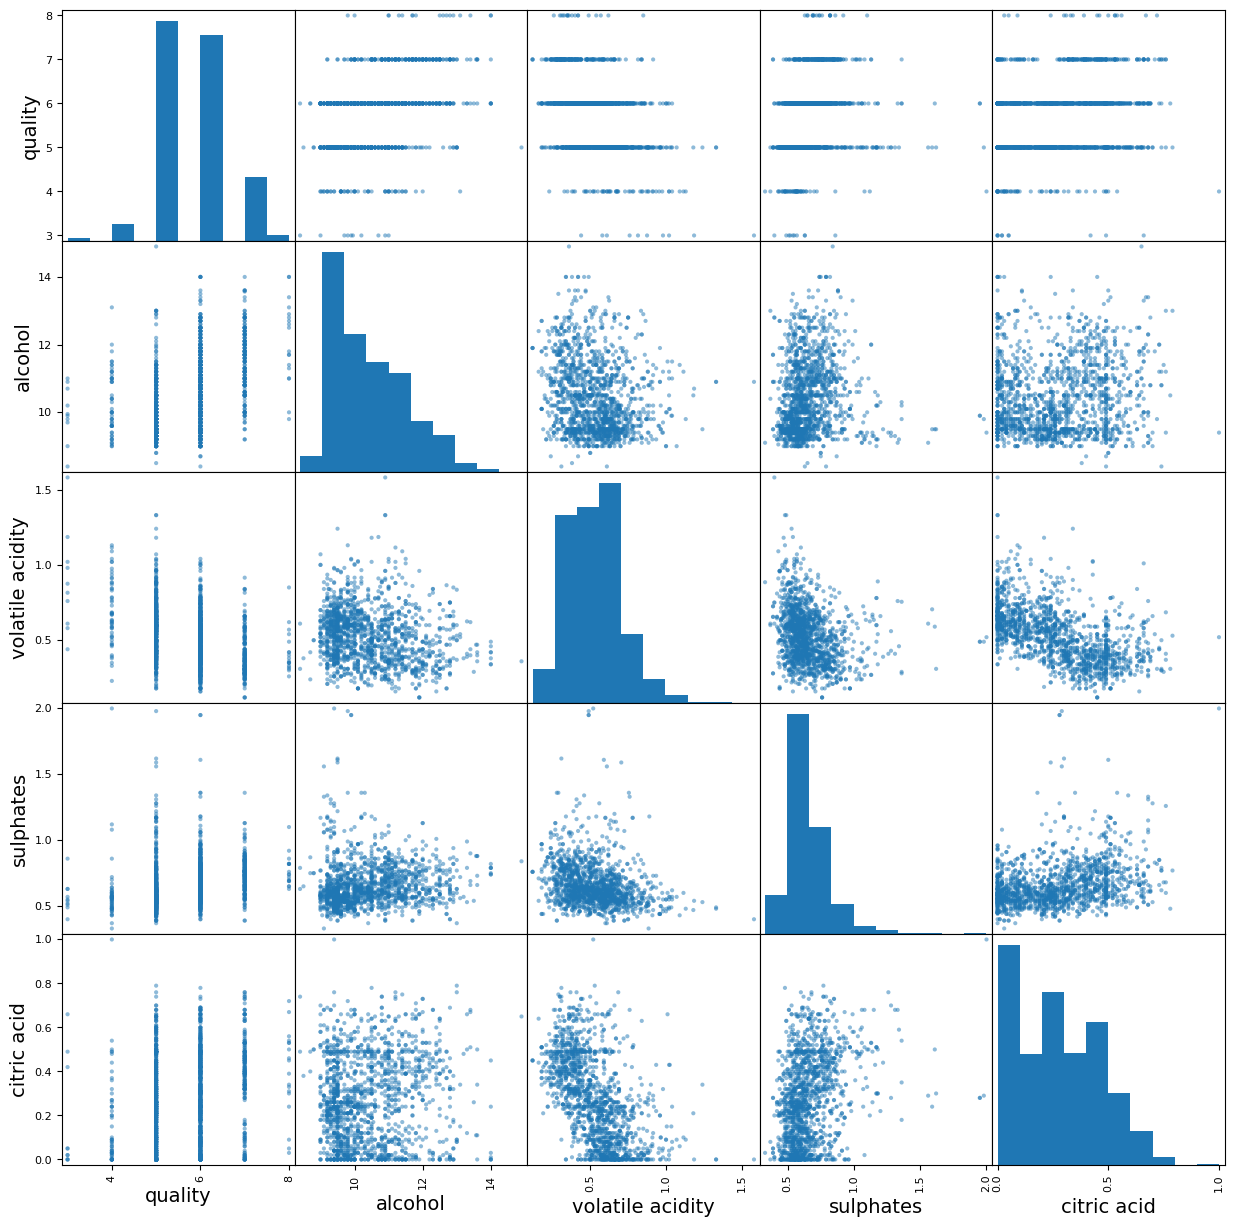

In [24]:
from pandas.plotting import scatter_matrix;

attributes = ["quality", "alcohol",
              "volatile acidity", "sulphates",
             "citric acid"
             ];

scatter_matrix(rwine[attributes], figsize=(15,15) );

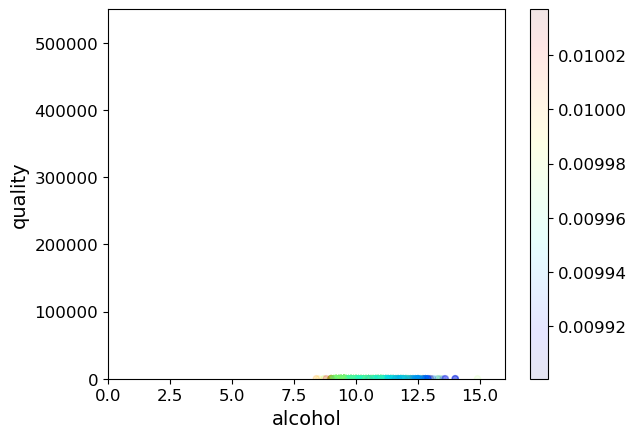

In [29]:

rwine.plot(kind="scatter", 
             x= "alcohol",
             y = "quality",
             c=rwine["density"]/100,
             cmap = plt.get_cmap("jet"),
             alpha=0.1)

plt.axis([0,16,0,550000]);

## Experimentando con combinaciones de atributos

In [20]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"];
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"];
housing["population_per_household"] = housing["population"] / housing["households"];


In [21]:

corr_matrix = housing.corr();
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

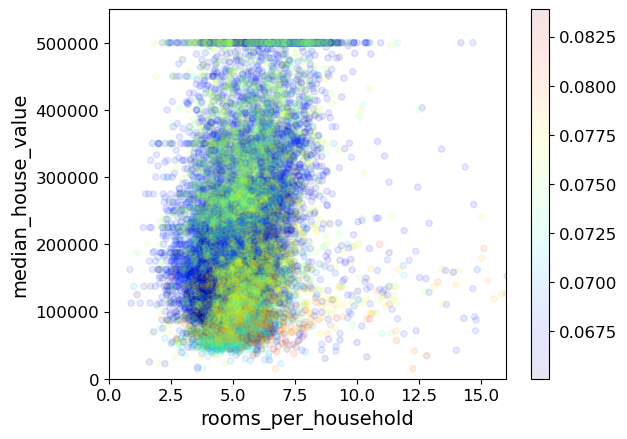

In [22]:

housing.plot(kind="scatter", 
             x= "rooms_per_household",
             y = "median_house_value",
             c=housing["latitude"]/500,
             cmap = plt.get_cmap("jet"),
             alpha=0.1)

plt.axis([0,16,0,550000]);


In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


La columna de ingresos medios (**median_income**) que es la que tiene más correlación con la columna a predecir, está muy desbalanceada.

<AxesSubplot:>

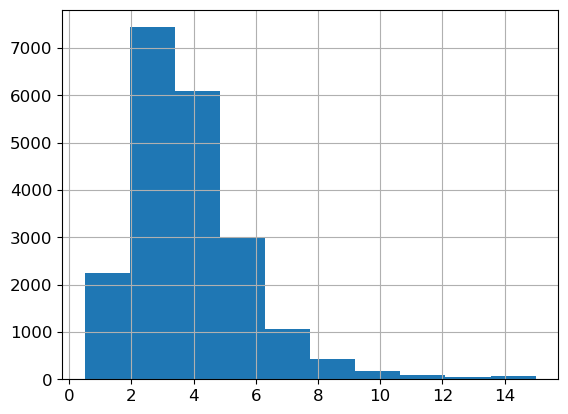

In [24]:
housing["median_income"].hist()

In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0,1.5,3.0,4.5,6, np.inf],
                               labels=[1,2,3,4,5]
                              );
housing["income_cat"]= pd.to_numeric(housing["income_cat"])

housing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  income_cat                20640 non-null  int64  
dtypes: flo

In [26]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

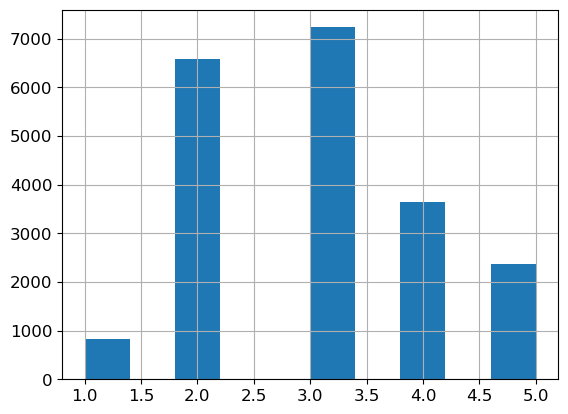

In [27]:
housing["income_cat"].hist()

In [28]:


corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

In [29]:
# BAckup
#backup = housing.copy()

# inplace= True pra que los cambios los realice en el dataframe, en False únicamente
# haría una copia par realizar estos cambios
housing.drop(["income_cat"], axis = 1, inplace = True)

# Preparando los datos para LOS algoritmos de aprendizaje automático

## Limpiando los datos

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [30]:
# housing.isnull().any(axis=1)

# any([1,6,7,0,9,8,7,6])

# any([0,0,0,0])


In [31]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [32]:
otrohousing=housing.copy()
otrohousing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [33]:

otrohousing=housing.copy()
median=otrohousing["total_bedrooms"].median()
otrohousing["total_bedrooms"].fillna(median, inplace=True)

median = otrohousing["bedrooms_per_household"].median()
otrohousing["bedrooms_per_household"].fillna(median,inplace=True)


In [34]:
otrohousing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [35]:

# libreria que arregla los NaN > pero no puede trabajar con un dataframe que no sea numérico
from sklearn.impute import SimpleImputer;
# la siguente orden quita la proximidad al mar porque no es numerica
imputer = SimpleImputer(strategy="median");



Remove the text attribute because median can only be calculated on numerical attributes:

In [36]:

proximity=housing["ocean_proximity"]
housing_num = housing.drop("ocean_proximity", axis=1)



In [37]:
# al pasar la el dataframe sin clomnas categoricas no numericas, y aprende a calcular las medias
# y rellenar los huecos con dichas medias
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  1.04888889e+00,  2.81811565e+00])

Check that this is the same as manually computing the median of each attribute:

In [39]:
housing_num.median()

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
rooms_per_household              5.229129
bedrooms_per_household           1.048889
population_per_household         2.818116
dtype: float64

Transform the training set:

In [40]:
X = imputer.transform(housing_num)

In [41]:
type(X)

numpy.ndarray

In [42]:
housing_tr = pd.DataFrame(X,
                          columns = housing_num.columns,
                          index=housing_num.index
                         )
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_household    20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [43]:
housing["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [44]:
housing_cat=housing[ ["ocean_proximity"] ]

housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(housing_cat)
ordinal_encoder.transform(housing_cat)

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder =OneHotEncoder()
cat_encoder.fit(housing_cat)
cat_encoder.transform(housing_cat)

# se puede unir los ultimos dos comandos por uno solo de la siguiente forma
# cat_encoder.fit_transform(housing_cat)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

#crea una matriz "sparse" que solo almacena las celdas de la matriz donde hay un valor, para ahorrar espacio
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [52]:

housing = pd.concat([housing_tr, proximity], axis=1)
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,1.133333,2.560606,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,1.315789,3.122807,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,1.120092,2.325635,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,1.171920,2.123209,INLAND


## Gestionando los atributos categóricos o de tipo texto

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [53]:
backup=housing.copy();

housing.reset_index(drop=False, inplace=True);
housing=housing.join(pd.DataFrame(housing_cat_1hot,columns=[cat for cat in cat_encoder.categories_[0]]));
housing=housing.drop(["ocean_proximity"], axis=1);
housing=housing.rename({"<1H OCEAN":"1H OCEAN"});
housing.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     20640 non-null  int64  
 1   longitude                 20640 non-null  float64
 2   latitude                  20640 non-null  float64
 3   housing_median_age        20640 non-null  float64
 4   total_rooms               20640 non-null  float64
 5   total_bedrooms            20640 non-null  float64
 6   population                20640 non-null  float64
 7   households                20640 non-null  float64
 8   median_income             20640 non-null  float64
 9   median_house_value        20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  <1H OCEAN                 20640 non-null  float64
 14  INLAND

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [72]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [74]:
# backup
# backup = housing.copy()

# resetea, recalcula, para juntar las columnas 
#housing.reset_index(drop= False, inplace = True)
#housing= housing.join(pd.DataFrame(housing_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
housing = housing.drop(["ocean_proximity"],axis=1);
housing=housing.rename({">1H OCEAN":"1h OCEAN"});
housing.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     20640 non-null  int64  
 1   longitude                 20640 non-null  float64
 2   latitude                  20640 non-null  float64
 3   housing_median_age        20640 non-null  float64
 4   total_rooms               20640 non-null  float64
 5   total_bedrooms            20433 non-null  float64
 6   population                20640 non-null  float64
 7   households                20640 non-null  float64
 8   median_income             20640 non-null  float64
 9   median_house_value        20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 2.2 MB


['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,INLAND,0.0,1.0,0.0,0.0,0.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


# Seleccionando y entrenando los modelos

## Creamos el Train y Test Set

In [54]:
# plantamos una semilla
np.random.seed(42)




In [55]:


def split_train_test(data, test_ratio):
    test_set_size  =int(len(housing)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    




In [56]:

X_train, X_test = split_train_test(housing, 0.20)
len(X_train), len(X_test)

(16512, 4128)

In [57]:
y_train = X_train["median_house_value"].copy()

X_train = X_train.drop("median_house_value", axis=1)

In [58]:

y_train


14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

## Entrenando y evaluando

In [59]:


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

Generamos las prediciones y las comparamos con los valores reales (sólo 10):

In [60]:
some_data = X_train.iloc[:5]
pred = lin_reg.predict(some_data)
pred





array([189222.32606977, 289750.13065837, 247995.03212576, 148997.42421926,
       157084.06650082])

Error cuadrático medio:
$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

In [61]:


from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




67959.44290399953

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

In [62]:


from sklearn.metrics import mean_absolute_error

#predictions = lin_reg.predict(X_train)
lin_mae = mean_absolute_error(y_train, predictions)
lin_mae



49260.80148875474

In [63]:


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)



DecisionTreeRegressor()

In [64]:

predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



0.0

## Mejorando la evaluación por medio de la validación cruzada >>>>>>> ESTE ES EL MODELO A SEGUIR


In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([65527.98854479, 71608.69738947, 68757.0982205 , 69558.18330438,
       72598.47545282, 67291.51718786, 66799.03337173, 70422.03813889,
       67780.94944367, 69255.05921284])

In [74]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)



Scores: [65527.98854479 71608.69738947 68757.0982205  69558.18330438
 72598.47545282 67291.51718786 66799.03337173 70422.03813889
 67780.94944367 69255.05921284]
Mean:   68959.90402669672
Standard deviation:    2085.669766574656


In [75]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores



array([65064.09102784, 71099.1464703 , 67891.779367  , 66432.1683076 ,
       68998.67636738, 65930.88359208, 65281.34125562, 69069.54653699,
       72964.09391525, 69571.18518294])

In [76]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)

Scores: [65527.98854479 71608.69738947 68757.0982205  69558.18330438
 72598.47545282 67291.51718786 66799.03337173 70422.03813889
 67780.94944367 69255.05921284]
Mean:   68959.90402669672
Standard deviation:    2085.669766574656


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [77]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state=42)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse




18055.174098100953

In [80]:

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

forest_rmse_scores =  np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [45402.785282   49965.84436981 48290.72346199 51042.32693196
 51159.77873672 45908.38731208 46840.1591     49431.64523033
 48158.27970838 49189.41351802]
Mean:   48538.93436512812
Standard deviation:    1903.6669990820637


In [83]:

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
predictions=svm_reg.predict(X_train)
svm_rmse=mean_squared_error(y_train, predictions)
svm_rmse.sqrt(svm_rmse)
svm_rmse


AttributeError: 'numpy.float64' object has no attribute 'sqrt'

In [75]:


svm_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

svm_rmse_scores =  np.sqrt(-forest_scores)
display_scores(svm_rmse_scores)


92744.93979513664

In [ ]:
# "xgboost" algoritmo similar a random forest, pero 
# en vez de hacerlo en paralelo, lo hace en serie
# pasando la salida con la entrada del siguiente, 
# puliendo el resultado

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive= "reg:squarederror", random_state=42)

xgb_reg.fit(X_train, y_train)
predictions=xgb_reg.predict(X_train)
xgb_mse=mean_squared_error(y_train, predictions)
xgb_rmse=np.sqrt(xgb_mse)
xgb_mse

# Afinando el modelo

## Grid Search

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

{'max_features': 6, 'n_estimators': 30}

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

63728.2208722647 {'max_features': 2, 'n_estimators': 3}
54813.35330602952 {'max_features': 2, 'n_estimators': 10}
52752.95069867988 {'max_features': 2, 'n_estimators': 30}
60282.020030620006 {'max_features': 4, 'n_estimators': 3}
52069.58816826777 {'max_features': 4, 'n_estimators': 10}
49996.66634820523 {'max_features': 4, 'n_estimators': 30}
57664.81055654801 {'max_features': 6, 'n_estimators': 3}
51050.205113040036 {'max_features': 6, 'n_estimators': 10}
49429.06207254693 {'max_features': 6, 'n_estimators': 30}
58939.730723940556 {'max_features': 8, 'n_estimators': 3}
51937.858466760634 {'max_features': 8, 'n_estimators': 10}
49963.022989912846 {'max_features': 8, 'n_estimators': 30}
62071.820065186905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53968.60720856824 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58006.2293367236 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51477.19314637942 {'bootstrap': False, 'max_features': 3, 'n_estimators'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076192,0.003622,0.006693,0.000142,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.908982e+09,-3.899592e+09,...,-4.061286e+09,1.777379e+08,18,-1.057447e+09,-1.090653e+09,-1.128368e+09,-1.098219e+09,-1.106787e+09,-1.096295e+09,2.316678e+07
1,0.245306,0.011282,0.015764,0.000255,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.960710e+09,-2.935455e+09,...,-3.004504e+09,6.805345e+07,11,-5.471995e+08,-5.683057e+08,-5.951718e+08,-5.804626e+08,-5.783017e+08,-5.738883e+08,1.586912e+07
2,0.710110,0.001782,0.041154,0.000329,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.779962e+09,-2.737927e+09,...,-2.782874e+09,5.167314e+07,9,-4.210153e+08,-4.397356e+08,-4.471757e+08,-4.368283e+08,-4.343039e+08,-4.358118e+08,8.564802e+06
3,0.118221,0.003369,0.006788,0.000140,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.803232e+09,-3.633764e+09,...,-3.633922e+09,1.794084e+08,16,-9.786097e+08,-9.933370e+08,-9.703163e+08,-9.309320e+08,-9.359749e+08,-9.618340e+08,2.436981e+07
4,0.385036,0.005512,0.015911,0.000356,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.702993e+09,-2.712584e+09,...,-2.711242e+09,3.187841e+07,8,-5.167354e+08,-4.989287e+08,-5.217442e+08,-5.204221e+08,-4.984938e+08,-5.112648e+08,1.038153e+07
5,1.140878,0.005952,0.042839,0.002432,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.542403e+09,-2.466091e+09,...,-2.499667e+09,2.746410e+07,3,-3.964187e+08,-3.870600e+08,-3.933111e+08,-3.943452e+08,-3.825936e+08,-3.907457e+08,5.133447e+06
6,0.160819,0.004517,0.006895,0.000245,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.267447e+09,-3.304500e+09,...,-3.325230e+09,9.536722e+07,12,-8.681918e+08,-8.698606e+08,-9.071344e+08,-9.006322e+08,-9.092800e+08,-8.910198e+08,1.818982e+07
7,0.526186,0.007083,0.015678,0.000233,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.614423e+09,-2.580080e+09,...,-2.606123e+09,1.011460e+08,4,-5.006148e+08,-4.832834e+08,-4.998076e+08,-4.949099e+08,-4.879207e+08,-4.933073e+08,6.748555e+06
8,1.577791,0.007854,0.042907,0.002362,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.456999e+09,-2.424495e+09,...,-2.443232e+09,4.205464e+07,1,-3.871882e+08,-3.818466e+08,-3.838786e+08,-3.831805e+08,-3.870269e+08,-3.846241e+08,2.130856e+06
9,0.208105,0.005337,0.006703,0.000102,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.482778e+09,-3.528070e+09,...,-3.473892e+09,4.021940e+07,14,-8.873773e+08,-9.056113e+08,-9.163445e+08,-8.862451e+08,-9.079560e+08,-9.007068e+08,1.189925e+07


## Randomized Search

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dc81c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dce1f0>},
                   random_state=42, scoring='neg_mean_squared_error')

49109.14791527485 {'max_features': 7, 'n_estimators': 180}
51593.09829433648 {'max_features': 5, 'n_estimators': 15}
50104.27354914674 {'max_features': 3, 'n_estimators': 72}
50557.67606385747 {'max_features': 5, 'n_estimators': 21}
49195.63731196165 {'max_features': 7, 'n_estimators': 122}
50128.098481866786 {'max_features': 3, 'n_estimators': 75}
49997.80581255347 {'max_features': 3, 'n_estimators': 88}
49443.04317531388 {'max_features': 5, 'n_estimators': 100}
49886.29807320597 {'max_features': 3, 'n_estimators': 150}
64774.860767984406 {'max_features': 5, 'n_estimators': 2}


# Evaluando el modelo con el Test Set

48931.11046491504

We can compute a 95% [confidence interval](https://es.wikipedia.org/wiki/Intervalo_de_confianza) for the test RMSE:

array([46742.26611832, 51026.14722653])

We could compute the interval manually like this:

(46742.266118322084, 51026.14722652882)

Alternatively, we could use a z-scores rather than t-scores:

(46742.923084145754, 51025.54540824693)